# values

In [50]:
# for sharon waver
lower = np.array([20,130,120])
higher = np.array([200,255,255])

# for face
lower = np.array([80,40,15])
higher = np.array([220,170,255])

### Read in an image

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#if nothing is passed in the second value, image is read as color image without the alpha channel, alpha is the degree of opaquness
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

In [11]:
#often 0 is used for grayscale, 1 for color, -1 for unchanged
img = cv2.imread('image.jpg', 0)

In [8]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

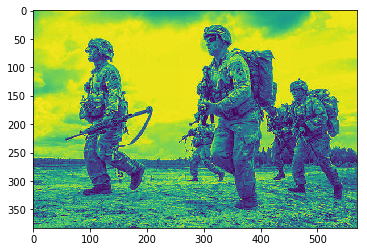

In [12]:
plt.imshow(img)

### Gray scale images

In [4]:
def resize(img):
    '''Custom function that resize the image to 480X320'''
    
    img = cv2.resize(img, (480,320))
    return img

In [5]:
import requests
import cv2
import numpy as np

In [6]:
url = "http://192.168.0.2:8080/shot.jpg"

# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('op.avi', fourcc, 20.0, (640,480))

while True:
    img_resp = requests.get(url)
    img_arr = np.array(bytearray(img_resp.content), dtype=np.uint8)
    img = cv2.imdecode(img_arr, -1)
#     out.write(img)
#     height,width, layers = img.shape
#     new_height = height/2
#     new_width = width/2
    
    rimg = cv2.resize(img, (480,320))
    
    gray = resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    
    cv2.imshow('cam', rimg)
    cv2.imshow('gray', gray)
    if cv2.waitKey(1) == 27:
#         out.release()
        cv2.destroyAllWindows()
        break
        

### Drawing custom shapes on an image

In [8]:
import cv2

img = cv2.imread('image.jpg',cv2.IMREAD_COLOR)

#drawing a line
#cv2.what_to_draw(image on which to draw, (starting coords), (ending coords), (B,G,R values), thickness of line)
cv2.line(img, (0,0), (150,150), (255,255,255), 15)

#drawing a rectangle(passing -1 in thickness parameter fills in the shape with that color)
cv2.rectangle(img, (15,25), (250,350), (0,255,0), 4)
# cv2.rectangle(img, (15,25), (300,400), (0,255,0),5)

#drawing a circle
cv2.circle(img, (250,250), 25, (255,0,0), -1)

#drawing a polygon
pts = np.array([[105,52], [151,255], [102,250]], np.int32)
cv2.polylines(img, [pts], True, (255,125,150), 4)


#writing text on the image
font = cv2.FONT_HERSHEY_TRIPLEX
cv2.putText(img, 'hello cv', (0,235), font,1,(121,243,231), 2, cv2.LINE_AA)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### video 4 image operations

In [10]:
img = cv2.imread('image.jpg', cv2.IMREAD_COLOR)

#Get the value at a particular pixel of any image
pix = img[321,22]
# print(pix)

#change the value at any pixel
# print('before', img[55,55])
img[55,55] = [255,255,255]
# print('after', img[55,55])

#Region of Image

# img[100:200, 100:205] = [255,255,255]
rimg = cv2.resize(img, (336,280))
# cv2.imshow('image', rimg)

#getting image size (height, width, channels)
print(img.shape)

# moving face of the soldier 1 to different location
img = cv2.resize(img, (1280,720))
face1 = img[110:170, 210:295]
img[0:60, 0:85] = face1

# moving face of the soldier 1 to different location
face2 = img[80:140, 685:770]
img[0:60, 85:170] = face2
# face1 = img[110:170, 210:295]
# img[0:60, 0:85] = face1

cv2.circle(img, (450,100), 10, (255,0,0), -1)

cv2.imshow('image', resize(img))
cv2.waitKey(0)
cv2.destroyAllWindows()

(383, 570, 3)


### video 5 Image arithmetics and Logic

In [12]:
#addition of images

def resize(img):
    img = cv2.resize(img, (480,320))
    return img

img1 = cv2.imread('farm_house.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('valley.jpg', cv2.IMREAD_COLOR)

# cv2.imshow('img1', resize(img1))
# cv2.imshow('img2', resize(img2))



#addition
res1 = img1 + img2
res2 = cv2.add(img1, img2)

cv2.imshow('res1', resize(res1))
cv2.imshow('res2', resize(res2))


#weighing

img1 = cv2.addWeighted(img1, 0.8, img2, 0.4, 0)
cv2.imshow('img1', resize(img1))

cv2.waitKey(0)
cv2.destroyAllWindows()

### masking

In [14]:
import cv2
import numpy as np

def resize(img):
    img = cv2.resize(img, (480,320))
    return img

img1 = cv2.imread('farm_house.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('c++.jpg', cv2.IMREAD_COLOR)

cv2.imshow('img1',resize(img1))
cv2.imshow('img2',resize(img2))

#Getting the dimensions of our image
height, width, channels = img2.shape
roi = img1[0:height, 0:width]

#converting color to gray
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray', img2gray)

#thresholding operation where we make the pixel values above 200 equal to 255(becomes white) and then we invert colors
# (white to black and black to white using cv2.THRESH_BINARY_INV). So black areas are that we need work with.
ret, mask = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('mask',mask)

#bitwise operation
mask_inv = cv2.bitwise_not(mask)
cv2.imshow('mask_inv',mask_inv)

img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)

cv2.imshow('img1_bg',img1_bg)
cv2.imshow('img2_fg',img2_fg)

dst = cv2.add(img1_bg, img2_fg)
cv2.imshow('dst',dst)
img1[0:height, 0:width] = dst

cv2.imshow('imag',resize(img1))

# cv2.imshow('bitwise not', mask_inv)

# cv2.imshow('mask',mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

### practice

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
run()

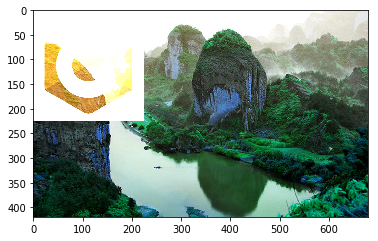

In [3]:
img1 = cv2.imread('valley.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('c++.jpg', -1)

plt.imshow(img1)
plt.imshow(img2)

length, breadth, channels = img2.shape

roi = img1[0:length, 0:breadth]
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask)

img1_bg = cv2.bitwise_and(roi,roi, mask_inv)
img2_fg = cv2.bitwise_and(img2, img2, mask)

dst = cv2.add(img1_bg, img2_fg)
cv2.imshow('dst',dst)
img1[0:length, 0:breadth] = dst

plt.imshow((img1))


mask_inv = cv2.bitwise_not(mask)

# plt.imshow(mask)

###  thresholding

In [6]:
def resize(img):
    img = cv2.resize(img, (480,320))
    return img

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('bookpage.jpg', cv2.IMREAD_COLOR)
# cv2.imshow('img', resize(img))


#lets try various thresholding

'''
ret, threshold = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)
cv2.imshow('thr',resize(threshold))

#another threshold
ret,thr = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('thrinv', resize(thr))

#another threshold
ret,thr = cv2.threshold(img, 12,255,cv2.THRESH_TOZERO)
cv2.imshow('tozero', thr)

#another threshold
ret, thr = cv2.threshold(img, 12, 255, cv2.THRESH_TRUNC)
cv2.imshow('trunc', thr)
'''

# All the above thresholds were not so useful
# cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
# cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
# 115 here is the size of the neighborhood its called the block size and 1 = C - It is just a constant which is subtracted from the mean or weighted mean calculated.

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 3)
plt.imshow(th)

cv2.waitKey(0)
cv2.destroyAllWindows()

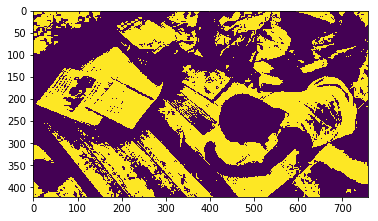

In [16]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('dim_text.jpg', cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

threshold1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 121, 1)
threshold2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 121, 1)

plt.imshow(threshold2)

### video 7 Color Filtering

In [23]:
# for sharon waver
lower = np.array([20,130,120])
higher = np.array([200,255,255])

In [50]:
# for face
lower = np.array([80,40,15])
higher = np.array([220,170,255])

In [17]:
import cv2
import requests
import numpy as np

def resize(img):
    img = cv2.resize(img, (480,320))
    return img

In [35]:
url = "http://192.168.0.2:8080/shot.jpg"

# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('op.avi', fourcc, 20.0, (640,480))

while True:
    img_resp = requests.get(url)
    img_arr = np.array(bytearray(img_resp.content), dtype=np.uint8)
    img = cv2.imdecode(img_arr, -1)
    
    #we convert the input into hsv
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    lower = np.array([20,130,120])
    higher = np.array([200,255,255])

    mask = cv2.inRange(hsv, lower, higher)
    mask_inv = cv2.bitwise_not(mask)
    
    res = cv2.bitwise_and(img, img, mask=mask)
    blur = cv2.GaussianBlur(res, (5,5), 0)
    
    kernel = np.ones((5,5), np.uint8)
    erosion = cv2.erode(res, kernel, iterations = 1)
    dilation = cv2.dilate(res, kernel, iterations = 1)
    
    #opening and closing where opening removes false postivie and closing removes false negatives
    opening = cv2.morphologyEx(res, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel)
    
    cv2.imshow('img', resize(img))
    cv2.imshow('hsv', resize(hsv))
    cv2.imshow('mask', resize(mask))
    cv2.imshow('res', resize(blur))
    cv2.imshow('opening', resize(opening))
    cv2.imshow('closing', resize(closing))
    
    if cv2.waitKey(1) == 27:
        cv2.destroyAllWindows()
        break
        

### video 8 Blurring and Smoothing

In [27]:
url = "http://192.168.0.2:8080/shot.jpg"

# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('op.avi', fourcc, 20.0, (640,480))

while True:
    img_resp = requests.get(url)
    img_arr = np.array(bytearray(img_resp.content), dtype=np.uint8)
    img = cv2.imdecode(img_arr, -1)
    
    #we convert the input into hsv
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    lower = np.array([80,40,15])
    higher = np.array([220,170,255])
    
    mask = cv2.inRange(hsv, lower, higher)
    mask_inv = cv2.bitwise_not(mask)
      
    res = cv2.bitwise_and(img, img, mask=mask)
    
    #we perform smoothing using kernel
    # 225 is average the kernel 15*15=225 depending on kernel the number changes
    kernel = np.ones((5,5), np.float32)/25
    smoothed = cv2.filter2D(res, -1, kernel)
    
    #we can perform gaussian blurring to reduce noise
    blur = cv2.GaussianBlur(res, (5,5), 0)
    
    #we can perform median blurring to reduce noise
    median = cv2.medianBlur(res, 15)
    
    bilateral = cv2.bilateralFilter(res, 15,75,75)
    
    
    
#     cv2.imshow('img', resize(img))
#     cv2.imshow('hsv', resize(hsv))
#     cv2.imshow('mask', resize(mask))
    cv2.imshow('res', resize(res))
    cv2.imshow('smoothed',resize(smoothed))
    cv2.imshow('blur', resize(blur))
    cv2.imshow('median', resize(median))
    cv2.imshow('bilateral', resize(bilateral))
    
    if cv2.waitKey(1) == 27:
        cv2.destroyAllWindows()
        break

###  Morphological Transformations

this video we cover erosion and dilation. erosion is like kernel in cnn which revolves over the images, if all the pixels
in the kernel are of same color they leave them if pixel are of different color they are removes and dialtion is opposite of
erosion. it expans the pixel until it cannot be expanded further

In [20]:
url = "http://192.168.0.2:8080/shot.jpg"

# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('op.avi', fourcc, 20.0, (640,480))

while True:
    img_resp = requests.get(url)
    img_arr = np.array(bytearray(img_resp.content), dtype=np.uint8)
    img = cv2.imdecode(img_arr, -1)
    
    #we convert the input into hsv
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
#     lower = np.array([20,130,120])
#     higher = np.array([200,255,255])
    
    lower = np.array([80,60,140])
    higher = np.array([210,170,255])
    
    mask = cv2.inRange(hsv, lower, higher)
    mask_inv = cv2.bitwise_not(mask)
      
    res = cv2.bitwise_and(img, img, mask=mask_inv)
    
    #erosion and dilation
    kernel = np.ones((5,5), np.uint8)
    erosion = cv2.erode(res, kernel, iterations = 1)
    dilation = cv2.dilate(res, kernel, iterations = 1)
    
    #opening and closing where opening removes false postivie and closing removes false negatives
    opening = cv2.morphologyEx(res, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel)
    
#     cv2.imshow('img', resize(img))
#     cv2.imshow('mask', resize(mask))
    cv2.imshow('erosion', resize(erosion))
    cv2.imshow('dilation', resize(dilation))
    cv2.imshow('res', resize(res))
    cv2.imshow('opening', resize(opening))
    cv2.imshow('closing', resize(closing))
    
    if cv2.waitKey(1) == 27:
        cv2.destroyAllWindows()
        break

### Edge Detection and Gradients

In [36]:
import cv2
import requests
import numpy as np

def resize(img):
    img = cv2.resize(img, (480,320))
    return img

In [37]:
url = "http://192.168.0.2:8080/shot.jpg"

# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('op.avi', fourcc, 20.0, (640,480))

while True:
    img_resp = requests.get(url)
    img_arr = np.array(bytearray(img_resp.content), dtype=np.uint8)
    img = cv2.imdecode(img_arr, -1)
    
    # edge detection
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    canny = cv2.Canny(img, 200, 200)
    
    #sobel filter
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    
    cv2.imshow('img', resize(img))
    cv2.imshow('laplacian', resize(laplacian))
#     cv2.imshow('sobelx',resize(sobelx))
#     cv2.imshow('sobely',resize(sobely))
    cv2.imshow('canny',resize(canny))
    
    if cv2.waitKey(1) == 27:
        cv2.destroyAllWindows()
        break